In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from google.colab import files

uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
df=pd.read_csv("./diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
y=df["Outcome"]
X=df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.30,
                                                  random_state=42)

In [7]:
!pip install lightgbm

In [0]:
from lightgbm import LGBMClassifier

In [0]:
lgbm_model=LGBMClassifier().fit(X_train, y_train)

In [11]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [12]:
y_pred=lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

**Model Tuning**

In [0]:
lgbm=LGBMClassifier()

In [0]:
lgbm_params={"learning_rate":[0.1,0.01,0.001],
            "n_estimators":[200,500,100],
            "max_depth":[1,2,35,7,8]}

In [16]:
lgbm_cv_model=GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   26.9s finished


In [17]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [0]:
lgbm_tuned=LGBMClassifier(learning_rate= 0.01, max_depth= 1, n_estimators= 500).fit(X_train, y_train)

In [20]:
y_pred=lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

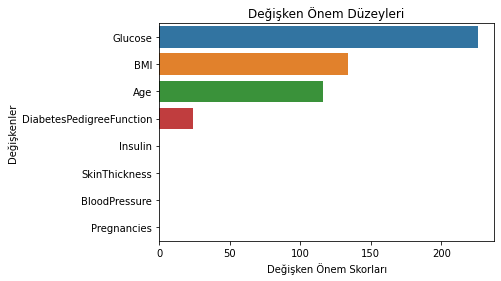

In [21]:
#değişken önem düzeyleri
feature_imp=pd.Series(lgbm_tuned.feature_importances_,
                      index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

#çıkan ilk 3 değişkeni önemli değişkenler olarak tanımladı, diğer değişkenleri önemli değişk olarak görmemiş gibi görünüyor.